**Reading and Understanding the Data**

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
dataset = pd.read_csv('Data\Car.csv')
dataset.head()

,car_ID,symboling,CarName,fueltype,doornumber,carbody,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,two,convertible,88.6,168.8,64.1,48.8,...,2,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,two,convertible,88.6,168.8,64.1,48.8,...,2,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,two,hatchback,94.5,171.2,65.5,52.4,...,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,four,sedan,99.8,176.6,66.2,54.3,...,2,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,four,sedan,99.4,176.6,66.4,54.3,...,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [18]:
dataset.shape

(1401, 21)

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401 entries, 0 to 1400
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            1401 non-null   int64  
 1   symboling         1401 non-null   int64  
 2   CarName           1401 non-null   object 
 3   fueltype          1401 non-null   object 
 4   doornumber        1401 non-null   object 
 5   carbody           1401 non-null   object 
 6   wheelbase         1401 non-null   float64
 7   carlength         1401 non-null   float64
 8   carwidth          1401 non-null   float64
 9   carheight         1401 non-null   float64
 10  curbweight        1401 non-null   int64  
 11  cylindernumber    1401 non-null   int64  
 12  enginesize        1401 non-null   int64  
 13  boreratio         1401 non-null   float64
 14  stroke            1401 non-null   float64
 15  compressionratio  1401 non-null   float64
 16  horsepower        1401 non-null   int64  


In [20]:
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.00000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.00000,1401.000000
mean,701.000000,0.738044,99.022769,174.328123,65.899714,53.870592,2563.222698,4.757316,126.635261,3.33192,3.262559,10.313419,103.053533,5104.246966,25.477516,30.96217,12947.879373
std,404.578175,1.233133,5.995116,12.179185,2.084768,2.432158,518.741334,1.382928,40.454671,0.26457,0.295429,4.170991,39.038580,478.764952,6.477518,6.87807,7598.145289
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.54000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.00000,5118.000000
25%,351.000000,0.000000,94.500000,166.300000,64.000000,52.000000,2145.000000,4.000000,97.000000,3.15000,3.120000,8.600000,70.000000,4800.000000,19.000000,25.00000,7799.000000
50%,701.000000,1.000000,97.200000,173.200000,65.500000,54.100000,2414.000000,4.000000,119.000000,3.31000,3.290000,9.000000,95.000000,5200.000000,25.000000,30.00000,9995.000000
75%,1051.000000,2.000000,102.400000,183.500000,66.900000,55.700000,3016.000000,6.000000,146.000000,3.59000,3.410000,9.400000,116.000000,5500.000000,30.000000,36.00000,15998.000000
max,1401.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.94000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.00000,45400.000000


In [21]:
dataset = dataset.drop('car_ID',axis=1)
dataset['CarName'] = dataset['CarName'].str.split(' ',expand=True)
dataset['CarName'] = dataset['CarName'].replace({'maxda': 'mazda', 'Nissan': 'nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [22]:
dataset.head()

,symboling,CarName,fueltype,doornumber,carbody,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,two,convertible,88.6,168.8,64.1,48.8,2548,2,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,two,convertible,88.6,168.8,64.1,48.8,2548,2,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,two,hatchback,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,four,sedan,99.8,176.6,66.2,54.3,2337,2,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,four,sedan,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


**Data Visualization**

C:\Users\Nam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


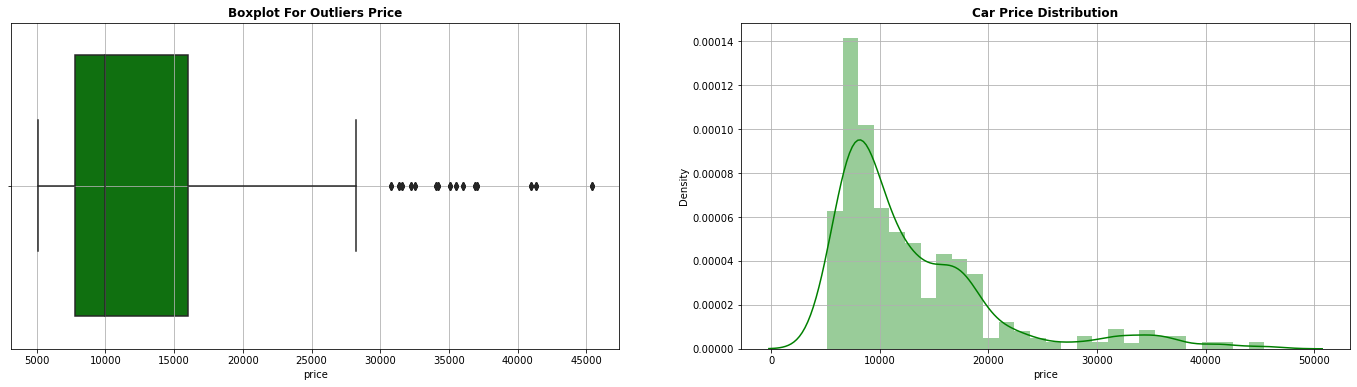

In [23]:
plt.figure(figsize=(24,6))
plt.subplot(1,2,1)
sns.boxplot(dataset["price"],color = 'g')
plt.grid(True)
plt.title("Boxplot For Outliers Price", fontweight="bold")

plt.subplot(1,2,2)
sns.distplot(dataset["price"],color = 'g')
plt.title("Car Price Distribution", fontweight="bold")
plt.grid(True)
plt.show()

In [24]:
col_categorical = list(dataset.select_dtypes(include="object"))
col_numeric = list(dataset.select_dtypes(exclude="object"))
print(col_categorical)
print(col_numeric)

['CarName', 'fueltype', 'doornumber', 'carbody']
['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


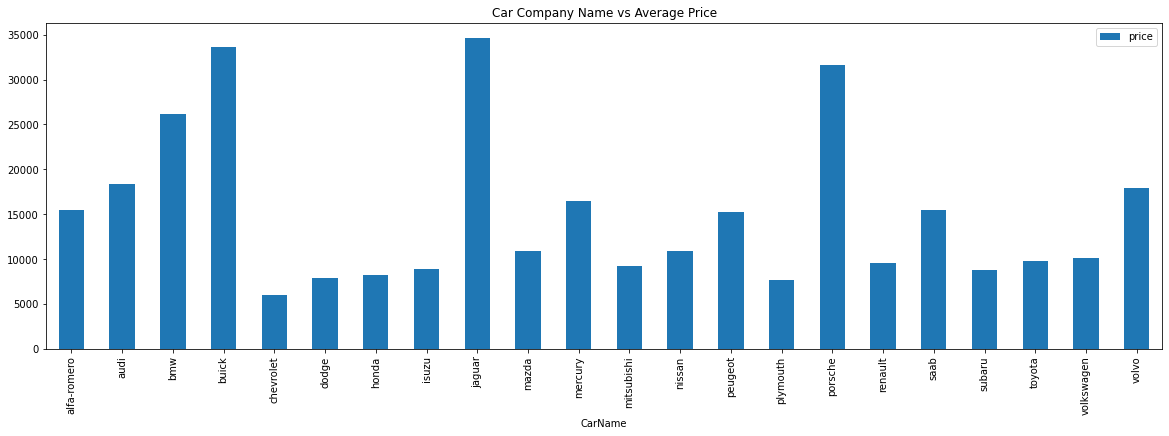

In [25]:
df_autox = pd.DataFrame(dataset.groupby(['CarName'])['price'].mean())
df_autox.plot.bar()
plt.gcf().set_size_inches(20, 6)
plt.title('Car Company Name vs Average Price')
plt.show()

Jaguar is the highest average price car

Nissan is the lowest average price car


C:\Users\Nam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


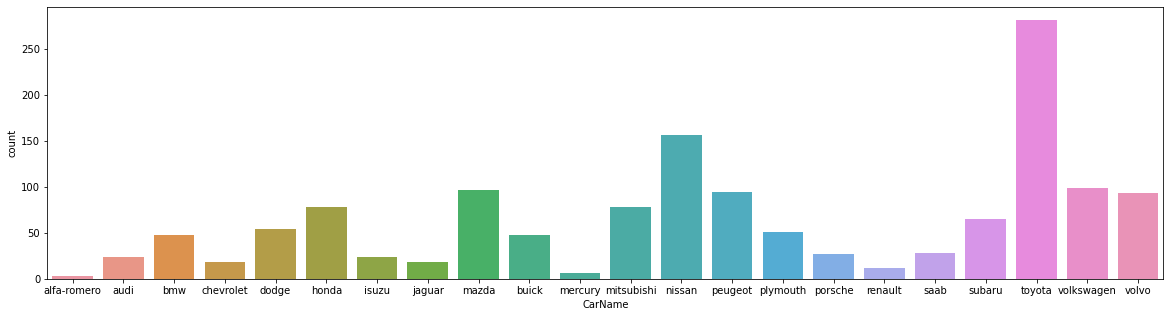

In [26]:
plt.figure(figsize=(20,5))
sns.countplot(dataset['CarName'])
plt.show()

Toyota is the car with the most quantity

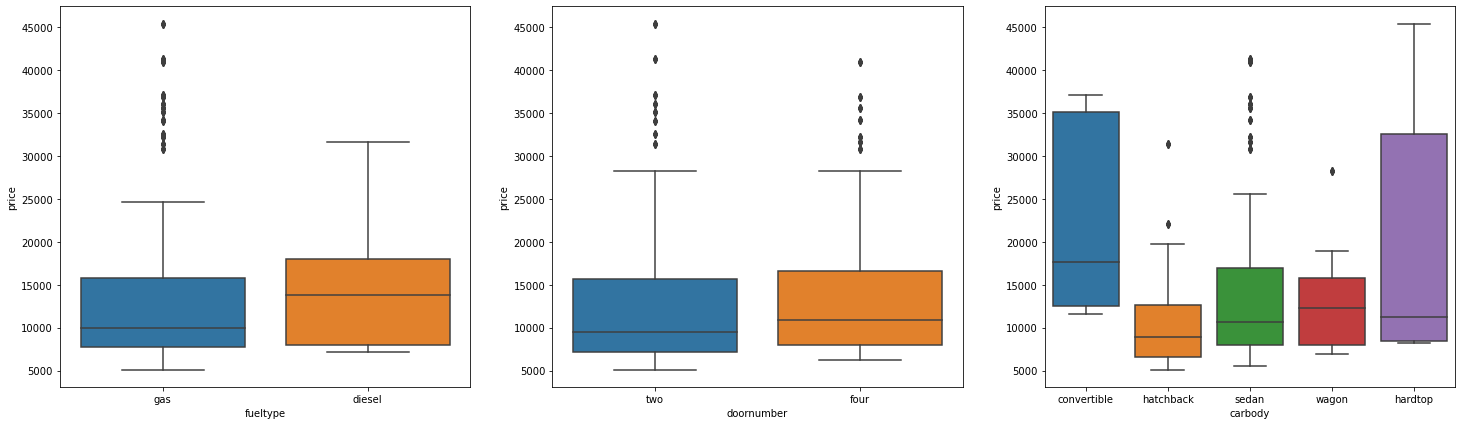

In [27]:
plt.figure(figsize=(25, 7))
plt.subplot(1,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = dataset)
plt.subplot(1,3,2)
sns.boxplot(x = 'doornumber', y = 'price', data = dataset)
plt.subplot(1,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = dataset)
plt.show()

Number of Gas fueled cars are way more than diesel fueled cars.
The number of cars using 4-door cars is more than 2-door cars.
Sedan is the most prefered car type.

C:\Users\Nam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


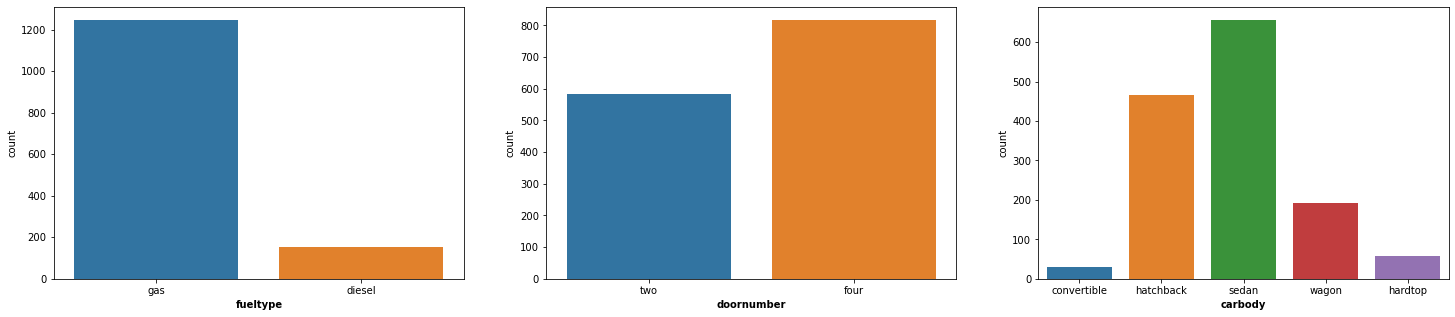

In [28]:
plt.figure(figsize=(25,5))
for i,col in enumerate(col_categorical[1:], start=1):
    plt.subplot(1,3,i)
    sns.countplot(dataset[col])
    plt.xlabel(col, fontweight="bold")
plt.show()

Number of Gas fueled cars are way more than diesel fueled cars.

The number of cars using 4-door cars is more than 2-door cars.

Sedan is the most prefered car type.


In [29]:
dataset

,symboling,CarName,fueltype,doornumber,carbody,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,two,convertible,88.6,168.8,64.1,48.8,2548,2,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,two,convertible,88.6,168.8,64.1,48.8,2548,2,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,two,hatchback,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,four,sedan,99.8,176.6,66.2,54.3,2337,2,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,four,sedan,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,2,toyota,gas,two,hardtop,98.4,176.2,65.6,52.0,2536,4,146,3.62,3.50,9.3,116,4800,24,30,9639.0
1397,2,toyota,gas,two,hatchback,98.4,176.2,65.6,52.0,2551,4,146,3.62,3.50,9.3,116,4800,24,30,9989.0
1398,2,toyota,gas,two,hardtop,98.4,176.2,65.6,52.0,2679,4,146,3.62,3.50,9.3,116,4800,24,30,11199.0
1399,2,toyota,gas,two,hatchback,98.4,176.2,65.6,52.0,2714,4,146,3.62,3.50,9.3,116,4800,24,30,11549.0
